In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from analysis import get_data
from analysis import read_log, read_logs
from analysis import generate_average

In [2]:
sizes = [100, 1000, 10000, 100000, 1000000, 10000000]

In [72]:
def plot_benchmark_by_size(df, hue_value, size=None, tag=None, files=None, x="sizes", y="time"):
    names = "-".join(files)
    sns.lineplot(data=df, x=x, y=y, hue="id");
    t = tag.title()
    label = f"{t}".replace("_", " ")
    plt.title(f"{label}")
    if "time" in y: y = f"{y}/s"
    if "time" in x: x = f"{x}/s"
    plt.xlabel(x.capitalize())
    plt.ylabel(y.capitalize())
    plt.savefig(f"images/mpi-{tag}-{names}.png")
    plt.savefig(f"images/mpi-{tag}-{names}.pdf")

In [68]:
def get_data(content, tag="mpi_mergesort", size=None):
    """
    TBD

    :param content: data output from running mergesort
    :type content: string
    :return: none
    :rtype: none
    """
    found = []
    lines = [line for line in content if "# csv" in line]

    for line in lines[1:]:
        entries = line.split(",")
        entry = [entries[a] for a in [1, 3, 9]]
        time = entry[1]
        name = entry[2]
        # print(entry[0].split(tag)[1].split("_")[1:])
        processors, size, id, repeat = entry[0].split(tag)[1].split("_")[1:]
        
        # print("entry[0")
        entry = [
            int(processors),
            # int(count),
            float(time),
            int(size),
            id,
            name,
            tag
        ]
        found.append(entry)
    return found

In [69]:
def read_log(log, size=None, tag="multiprocessing_mergesort"):
    if ".log" not in log:
        log = f"log/{log}-{size}.log"
    f = open(log, "r")
    content = f.read().splitlines()
    data = get_data(content, tag=tag, size=size)
    return data

    processes    time      size id  name            tag
0           4   0.905       100  0  alex  mpi_mergesort
1           4   0.896       100  0  alex  mpi_mergesort
2           4   0.917       100  0  alex  mpi_mergesort
3           4   0.915       100  0  alex  mpi_mergesort
4           4   0.923       100  0  alex  mpi_mergesort
..        ...     ...       ... ..   ...            ...
55          4  18.241  10000000  1  alex  mpi_mergesort
56          4  16.284  10000000  1  alex  mpi_mergesort
57          4  15.166  10000000  1  alex  mpi_mergesort
58          4  15.500  10000000  1  alex  mpi_mergesort
59          4  17.057  10000000  1  alex  mpi_mergesort

[110 rows x 6 columns]


/Users/alexandra/ENV3/lib/python3.10/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

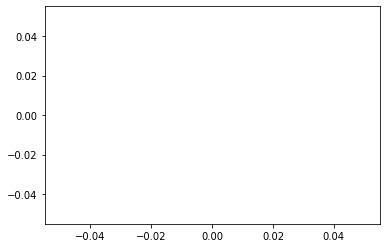

In [75]:
tag = "mpi_mergesort"
node = "2400MHz"
ids = ["0", "1"]
files = ["alex"]
frames = []
for file in files:
    for id in ids: 
        frame = []
        for size in sizes: 
            log = f'{tag}-{node}-{file}-{id}'
            _frame = read_log(log, size=size, tag=tag)
            frame = frame + _frame
        frames.append(frame)
# print(frames)


df = pd.DataFrame()
for frame in frames:
    _df = pd.DataFrame(data=frame,
                columns=["processes", "time", "size", "id", "name", "tag"])
    df = pd.concat([df, _df])
print(df)
plot_benchmark_by_size(df, "id", tag, ids, x="size", y="time")
